In [37]:
import pandas as pd
import json
import requests
from config import API_Key
import time
import datetime
from time import sleep
import random
import matplotlib.pyplot as plt

In [2]:
cities_states=pd.read_csv("Geo_Data/IP2LOCATION-GEONAMEID.CSV")
cities_states=cities_states.drop(columns=["geonameid"])
cities_states

,country_code,region_name,city_name
0,AD,Andorra la Vella,Andorra la Vella
1,AD,Andorra la Vella,Santa Coloma
2,AD,Canillo,Soldeu
3,AD,Canillo,Canillo
4,AD,Canillo,El Tarter
...,...,...,...
110068,ZW,Midlands,Redcliff
110069,ZW,Midlands,Gokwe
110070,ZW,Midlands,Gweru
110071,ZW,Midlands,Kwekwe


In [3]:
country_codes=pd.read_csv("Geo_Data/country_code_data.csv")
country_codes=country_codes.rename(columns={"Name":"Country"})
country_codes

,Country,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


In [4]:
country=[]
for i in range(0,len(cities_states)):
    try:
        code=cities_states.loc[i,'country_code']
        country_name=country_codes['Country'].loc[country_codes['Code']==code]
        country.append(country_name.values[0])
    except IndexError:
        country.append("Index Error")

In [13]:
cities_states["Country"]=country
cities_states=cities_states.rename(columns={"city_name":"City","region_name":"State"})
cities_states


,country_code,State,City,Country
0,AD,Andorra la Vella,Andorra la Vella,Andorra
1,AD,Andorra la Vella,Santa Coloma,Andorra
2,AD,Canillo,Soldeu,Andorra
3,AD,Canillo,Canillo,Andorra
4,AD,Canillo,El Tarter,Andorra
...,...,...,...,...
110068,ZW,Midlands,Redcliff,Zimbabwe
110069,ZW,Midlands,Gokwe,Zimbabwe
110070,ZW,Midlands,Gweru,Zimbabwe
110071,ZW,Midlands,Kwekwe,Zimbabwe


In [42]:
# get dataframe of cities, climate class, and population
df=pd.read_csv("Clean_Data/cities_climate_pop.csv")
df=df.drop(columns=['Unnamed: 0'])
df

,City,Climate Classification,Lat,Lon,Country,Population
0,Tokyo,Cfa,35.6839,139.7744,Japan,39105000.0
1,Jakarta,Af,-6.2146,106.8451,Indonesia,35362000.0
2,Delhi,BSk,28.6667,77.2167,India,31870000.0
3,Delhi,BSk,37.4306,-120.7759,United States,12301.0
4,Manila,Am,14.6000,120.9833,Philippines,23971000.0
...,...,...,...,...,...,...
41781,Los Blancos,Cwa,-23.5996,-62.6000,Argentina,1145.0
41782,Mirbāţ,BWh,16.9924,54.6918,Oman,1120.0
41783,Dikson,ET,73.5070,80.5451,Russia,1113.0
41784,Klyuchi,ET,56.3000,160.8500,Russia,1089.0


In [45]:
states=[]
for i in range(0,len(df)):
    try:
        country=df.loc[i,'Country']
        city=df.loc[i,'City']
        state_name=cities_states['State'].loc[(cities_states['City']==city) & (cities_states['Country']==country)]
        states.append(state_name.values[0])
    except IndexError:
        states.append("Index Error")
    

In [46]:
states

['Tokyo',
 'Jakarta Raya',
 'Delhi',
 'California',
 'National Capital Region',
 'Index Error',
 'Index Error',
 'Maharashtra',
 'Shanghai',
 'Ciudad de Mexico',
 'Guangdong',
 'Al Qahirah',
 'Georgia',
 'Georgia',
 'Beijing',
 'Index Error',
 'Index Error',
 'Index Error',
 'Idaho',
 'Krung Thep Maha Nakhon',
 'Dhaka',
 'Ciudad Autonoma de Buenos Aires',
 'Cauca',
 'Puntarenas',
 'Index Error',
 'Index Error',
 'Lagos',
 'Faro',
 'Istanbul',
 'Sindh',
 'Index Error',
 'Guangdong',
 'Index Error',
 'Index Error',
 'Index Error',
 'California',
 'Rio de Janeiro',
 'Sichuan',
 'Hebei',
 'Tamil Nadu',
 'Punjab',
 'England',
 'Ontario',
 'Kentucky',
 'Kentucky',
 'Ile-de-France',
 'Arkansas',
 'Arkansas',
 'Arkansas',
 'Arkansas',
 'Arkansas',
 'Tianjin',
 'Shandong',
 'Hebei',
 'Henan',
 'Henan',
 'Index Error',
 'Hubei',
 'Hebei',
 'Aichi',
 'Shandong',
 'Lima',
 'New York',
 'Henan',
 'Luanda',
 'Jiangxi',
 'Henan',
 'Wilayah Persekutuan Kuala Lumpur',
 'Illinois',
 'Shandong',
 'Chongq

In [58]:
df["State"]=states
df=df[df["State"].str.contains("Index Error")==False]
df

,City,Climate Classification,Lat,Lon,Country,Population,State
0,Tokyo,Cfa,35.6839,139.7744,Japan,39105000.0,Tokyo
1,Jakarta,Af,-6.2146,106.8451,Indonesia,35362000.0,Jakarta Raya
2,Delhi,BSk,28.6667,77.2167,India,31870000.0,Delhi
3,Delhi,BSk,37.4306,-120.7759,United States,12301.0,California
4,Manila,Am,14.6000,120.9833,Philippines,23971000.0,National Capital Region
...,...,...,...,...,...,...,...
41745,Uspallata,BSk,-32.5931,-69.3460,Argentina,2390.0,Mendoza
41747,Ceduna,BSk,-32.1167,133.6667,Australia,2157.0,South Australia
41753,Konza,Cwb,-1.7496,37.1200,Kenya,2004.0,Machakos
41770,Nyimba,Cwa,-14.5495,30.8100,Zambia,1336.0,Eastern


In [59]:
#get a list of all climate classifcations
df["Climate Classification"].value_counts()
all_climates=[x for x in df["Climate Classification"].value_counts().index]
all_climates

['Cfb',
 'Cfa',
 'Dfb',
 'Csa',
 'Aw',
 'Dfa',
 'Csb',
 'Am',
 'Af',
 'BSk',
 'Cwa',
 'BSh',
 'Dfc',
 'As',
 'BWh',
 'Cwb',
 'Dwa',
 'BWk',
 'Dwb',
 'ET',
 'Dsb',
 'Cfc',
 'Dwc',
 'Dsa',
 'Dsc',
 'Dfd',
 'Cwc']

In [60]:
#filter dataframe as required. This instance, going to compare all large cities (>=3,000,000  pop)
pop= 3000000
classification = all_climates
df_large_cities=df.loc[(df['Climate Classification'].isin(classification)) & (df['Population'] >=pop)]
df_large_cities.reset_index(drop=True)



,City,Climate Classification,Lat,Lon,Country,Population,State
0,Tokyo,Cfa,35.6839,139.7744,Japan,39105000.0,Tokyo
1,Jakarta,Af,-6.2146,106.8451,Indonesia,35362000.0,Jakarta Raya
2,Delhi,BSk,28.6667,77.2167,India,31870000.0,Delhi
3,Manila,Am,14.6000,120.9833,Philippines,23971000.0,National Capital Region
4,Mumbai,Aw,19.0758,72.8775,India,22186000.0,Maharashtra
...,...,...,...,...,...,...,...
210,Jaipur,Aw,26.9167,75.8667,India,3073350.0,Rajasthan
211,Xinzhou,Dwb,38.4178,112.7233,China,3067501.0,Hubei
212,Wuzhou,Cfa,23.4833,111.3167,China,3061100.0,Guangxi Zhuangzu
213,Addis Ababa,Cwb,9.0272,38.7369,Ethiopia,3041002.0,Adis Abeba


In [61]:
#get results for each city in dataframe 
aiq_column=[]
for i in range(0,len(df_large_cities)):
    try:
        city=df_large_cities.loc[i,"City"]
        state=df_large_cities.loc[i,"State"]
        country=df_large_cities.loc[i,"Country"]
        url=f"http://api.airvisual.com/v2/city?city={city}&state={state}&country={country}&key=8705516e-de91-49da-bfb5-5b1950d462d5"
        data=requests.get(url).json()
        aiq_column.append(data["data"]["current"]["pollution"]["aqius"])
        time.sleep(1)
    except KeyError:
        aiq_column.append("API_Error")
        time.sleep(1)


In [62]:
aiq_column

['API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_Error',
 'API_

In [ ]:
aiq_column

In [65]:
#doing this as suddenly having problems with API and all results are returning API ERROR. Results are therefore not at all accurate.
aiq_2=res = [random.randrange(1, 50, 1) for i in range(215)]
aiq_2

[28,
 47,
 16,
 30,
 45,
 47,
 26,
 21,
 14,
 7,
 35,
 5,
 18,
 25,
 2,
 1,
 3,
 48,
 44,
 39,
 12,
 20,
 34,
 23,
 9,
 5,
 1,
 18,
 2,
 44,
 38,
 43,
 43,
 30,
 21,
 25,
 20,
 11,
 11,
 31,
 42,
 29,
 8,
 12,
 37,
 40,
 12,
 12,
 42,
 3,
 36,
 2,
 41,
 37,
 19,
 48,
 42,
 42,
 40,
 10,
 42,
 13,
 21,
 48,
 22,
 19,
 36,
 38,
 36,
 3,
 49,
 27,
 39,
 28,
 25,
 40,
 42,
 11,
 4,
 19,
 47,
 41,
 40,
 39,
 39,
 15,
 13,
 23,
 4,
 33,
 4,
 44,
 46,
 9,
 45,
 44,
 38,
 14,
 1,
 9,
 43,
 18,
 36,
 11,
 23,
 46,
 3,
 24,
 43,
 22,
 30,
 1,
 11,
 40,
 6,
 11,
 15,
 39,
 34,
 17,
 21,
 23,
 1,
 13,
 5,
 42,
 47,
 47,
 31,
 18,
 6,
 6,
 35,
 45,
 25,
 7,
 17,
 30,
 42,
 46,
 30,
 20,
 31,
 30,
 24,
 12,
 1,
 49,
 13,
 14,
 26,
 7,
 29,
 49,
 26,
 46,
 32,
 47,
 22,
 22,
 9,
 17,
 26,
 18,
 36,
 44,
 16,
 40,
 32,
 16,
 38,
 29,
 2,
 14,
 14,
 7,
 44,
 39,
 18,
 32,
 40,
 10,
 24,
 12,
 32,
 36,
 10,
 49,
 11,
 12,
 14,
 32,
 28,
 10,
 49,
 23,
 24,
 31,
 18,
 33,
 34,
 10,
 49,
 20,
 41,
 41,
 6

In [66]:
df_large_cities['Air Quality Index']=aiq_2
df_large_cities

c:\Users\bverb\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,City,Climate Classification,Lat,Lon,Country,Population,State,Air Quality Index
0,Tokyo,Cfa,35.6839,139.7744,Japan,39105000.0,Tokyo,28
1,Jakarta,Af,-6.2146,106.8451,Indonesia,35362000.0,Jakarta Raya,47
2,Delhi,BSk,28.6667,77.2167,India,31870000.0,Delhi,16
4,Manila,Am,14.6000,120.9833,Philippines,23971000.0,National Capital Region,30
7,Mumbai,Aw,19.0758,72.8775,India,22186000.0,Maharashtra,45
...,...,...,...,...,...,...,...,...
356,Jaipur,Aw,26.9167,75.8667,India,3073350.0,Rajasthan,24
358,Xinzhou,Dwb,38.4178,112.7233,China,3067501.0,Hubei,29
359,Wuzhou,Cfa,23.4833,111.3167,China,3061100.0,Guangxi Zhuangzu,38
360,Addis Ababa,Cwb,9.0272,38.7369,Ethiopia,3041002.0,Adis Abeba,3


In [67]:
#remove all rows with API_Error
df_large_cities=df_large_cities[df_large_cities["Air Quality Index"].str.contains("API_Error")==False]

AttributeError: Can only use .str accessor with string values!

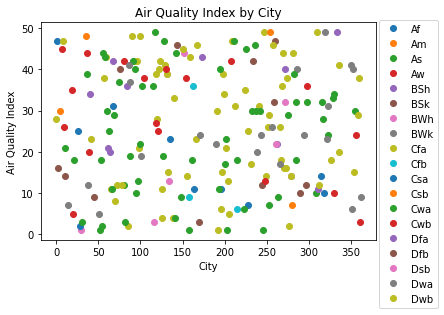

In [68]:
#this should show the air quality for each city easily discernable by the climate classificaiton
#since the API stopped returning values, the results are random.
graphdata=pd.DataFrame({"X Value":df_large_cities.index,"Y Value":df_large_cities['Air Quality Index'],"Category":df_large_cities["Climate Classification"]})
groups = graphdata.groupby("Category")
for name, group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Air Quality Index by City")
plt.xlabel("City")
plt.ylabel("Air Quality Index")
plt.legend(bbox_to_anchor=(0.2, 0.2, 1, 0.3), loc="right")




